# Visualising American Community Survey recent grads data


### Introduction:
In this project, we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.The original data on job outcomes was released by American Community Survey. The cleaned version of the original dataset can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors)  

### Aim: 
To explore the data using visualisation techniques


### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and exploring the data 

In [2]:
recent_grads= pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


df.head() helps us get acquainted with how the data is structured.

In [4]:
raw_data_count= recent_grads.shape[0]
raw_data_count

173

So we now know that our dataframe has 173 rows. Let us explore recent_grads further to check if there are any na values. We'll do this by employing the df.describe() method 

### Dealing with na values

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It is evident that the count for columns like 'Total','Men', 'Women' etc is 172. But our total rows are 173. Hence we need to remove the rows containing na values in order to carry out the visualisation analysis.

In [6]:
recent_grads = recent_grads.dropna() 

In [7]:
cleaned_data_count= recent_grads.shape[0]
raw_data_count-cleaned_data_count

1

The one row containing missing values has been removed.

### Generate scatter plots in separate jupyter notebook cells to explore the following relations:

#### Sample_size and Median

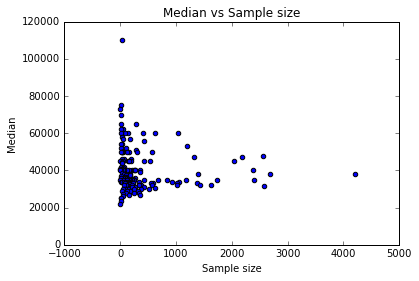

In [35]:
ax = recent_grads.plot(x='Sample_size',y='Median',kind='scatter')
ax.set_xlabel('Sample size')
ax.set_ylabel('Median')
ax.set_title('Median vs Sample size')

#### Sample_size and Unemployment_rate

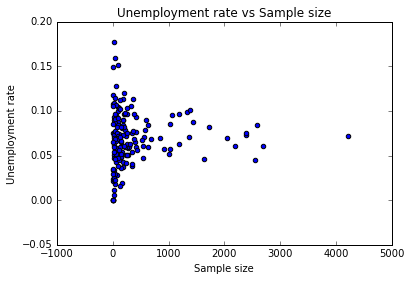

In [36]:
ax = recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter')
ax.set_xlabel('Sample size')
ax.set_ylabel('Unemployment rate')
ax.set_title('Unemployment rate vs Sample size')

#### Full_time and Median

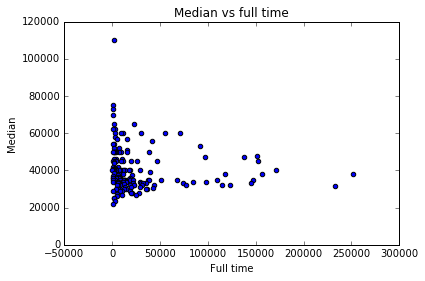

In [37]:
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax.set_xlabel('Full time')
ax.set_ylabel('Median')
ax.set_title('Median vs full time')

#### ShareWomen and Unemployment_rate

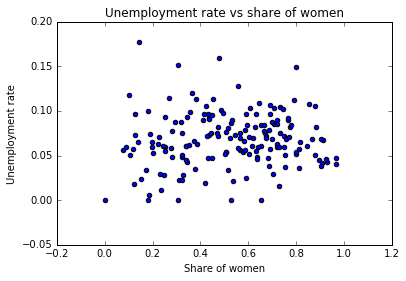

In [38]:
ax = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')
ax.set_xlabel('Share of women')
ax.set_ylabel('Unemployment rate')
ax.set_title('Unemployment rate vs share of women')

####  Men and Median

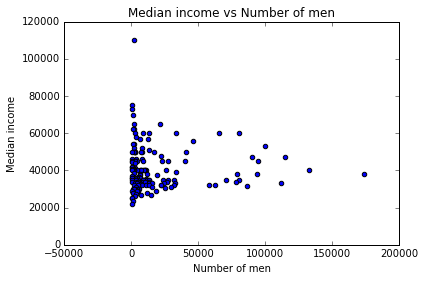

In [39]:
ax = recent_grads.plot(x='Men',y='Median',kind='scatter')
ax.set_xlabel('Number of men')
ax.set_ylabel('Median income')
ax.set_title('Median income vs Number of men')

#### Women and Median

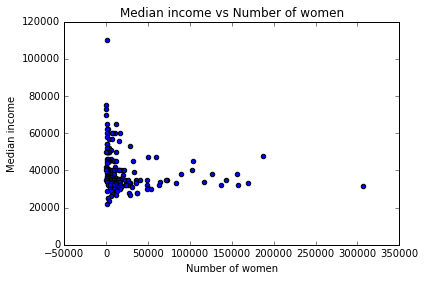

In [40]:
ax = recent_grads.plot(x='Women',y='Median',kind='scatter')
ax.set_xlabel('Number of women')
ax.set_ylabel('Median income')
ax.set_title('Median income vs Number of women')

 ### Use the plots to explore the following questions:
1. Do students in more popular majors make more money?
2. Do students that majored in subjects that were majority female    make more money?
3. Is there any link between the number of full-time employees      and median salary?


#### Do students in more popular majors make more money?
To know about the relationship between popularity of majors and the median income, we'll make a scatter plot of the variables 'Total' and 'Median'.

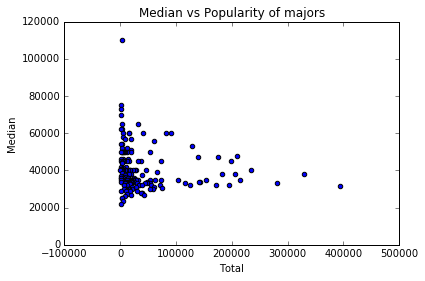

In [8]:
ax1 = recent_grads.plot(x='Total',y='Median',kind='scatter')
ax1.set_xlabel('Total')
ax1.set_ylabel('Median')
ax1.set_title('Median vs Popularity of majors')

It can be inferred from the plot that as 'Total' increases, 'Median' decreases. If one finds it hard to analyze the results from this plot, one could use .set_xlim() to zoom in on this plot. Lets set the x limit from 0 to 100000 as most of the values reside within this range.

(0, 100000)

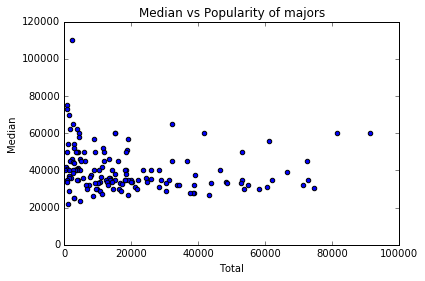

In [21]:
ax1 = recent_grads.plot(x='Total',y='Median',kind='scatter')
ax1.set_xlabel('Total')
ax1.set_ylabel('Median')
ax1.set_title('Median vs Popularity of majors')
#Setting the limit
ax1.set_xlim(0,100000)

One could see that 'Median' follows a decreasing trend as 'Total' values increase. It can be concluded from the above plot that students in more popular majors make less money.

#### Do students that majored in subjects that were majority female    make more money?
To know about this relationship, we'll make a scatter plot of the variables 'ShareWomen' and 'Median'.

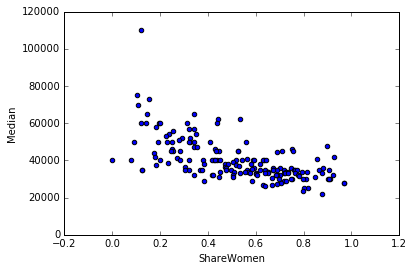

In [22]:
ax = recent_grads.plot(x='ShareWomen',y='Median',kind='scatter')
ax1.set_xlabel('Share of women')
ax1.set_ylabel('Median')
ax1.set_title('Median income vs Share of Women')

It is quite evident from the above plot that as the share of women in a major increases, the median income shows a declining trend. Hence, students that majored in subjects that were majority female make less money.

#### Is there any link between the number of full-time employees and median salary?

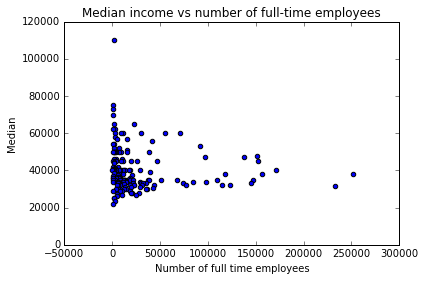

In [24]:
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax.set_xlabel('Number of full time employees')
ax.set_ylabel('Median')
ax.set_title('Median income vs number of full-time employees')

Yes, there is a link between the number of full-time employees and median salary. As the number of full-time employees increase, the median income decreases. If one would like to observe this relationship better, set the x limit from 0 to 50000- you'll get a zoomed in view.

### Histograms
Use the plots to explore the following questions:
- What percent of majors are predominantly male? Predominantly     female?
- What's the most common median salary range?

#### What percent of majors are predominantly male? Predominantly     female?

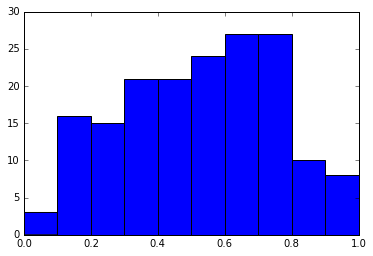

In [29]:
counts, bins, bars=plt.hist(recent_grads['ShareWomen'],bins=10,range=(0,1))
plt.show()

plt.hist() returns the counts of each bin in a histogram. We could use the counts to know what percent of majors are predominantly male and predominantly female. The first five counts of 'counts' array would give us the majors which are predominantly male, last five: predominantly female. 

In [30]:
counts

array([ 3., 16., 15., 21., 21., 24., 27., 27., 10.,  8.])

In [36]:
mostly_men= sum(counts[0:5])
mostly_women= sum(counts[5:10])
percent_men= mostly_men/172
percent_women= mostly_women/172

In [37]:
print(percent_men,percent_women)

0.4418604651162791 0.5581395348837209


Close to 44% of majors are predominantly male while the remaining 56% are predominantly female.

#### What's the most common median salary range?

(array([ 0.,  0., 15., 84., 40., 19., 10.,  3.,  0.,  0.,  0.,  1.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000.]),
 <a list of 12 Patch objects>)

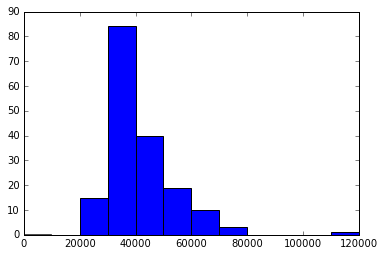

In [42]:
plt.hist(recent_grads['Median'],bins=12,range=(0,120000))

As can be seen from the above histogram, the most common median salary range is 30000-40000.

### Scatter matrix plot

#### Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.

In [10]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefc6d542b0>,
      dtype=object)

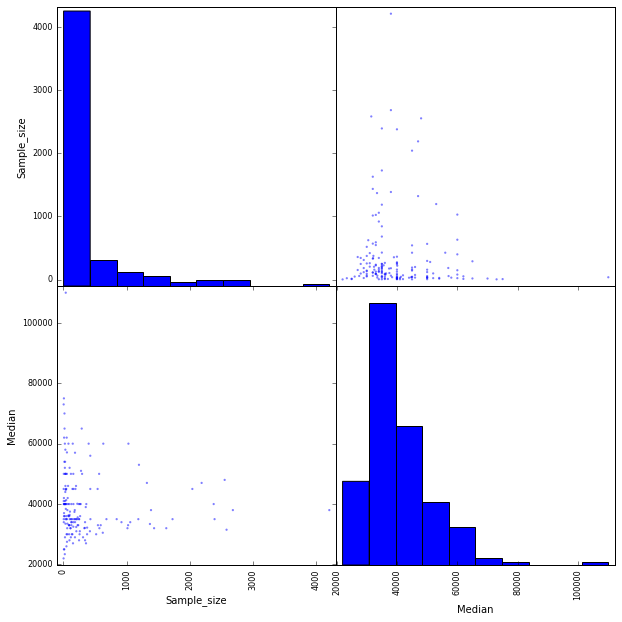

In [11]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

#### Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefc4a2cda0>,
      dtype=object)

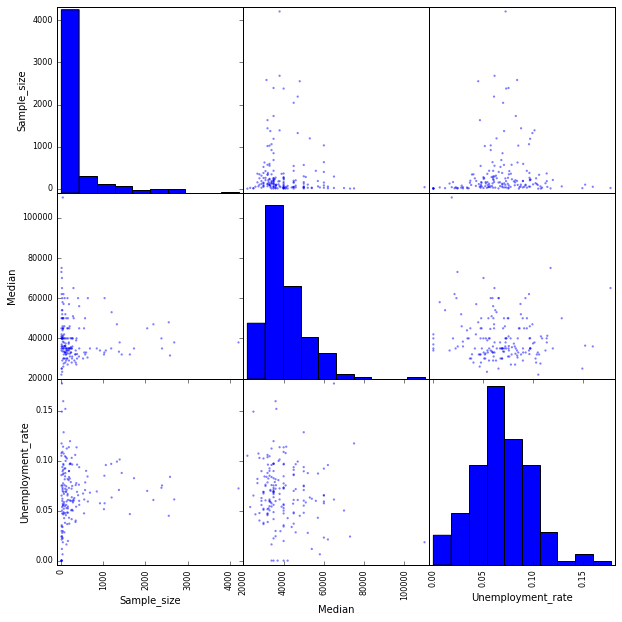

In [12]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

### Bar plots

#### Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

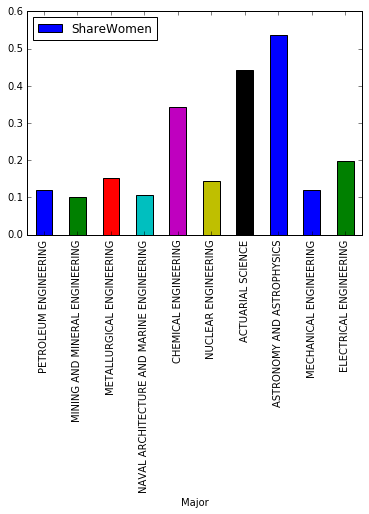

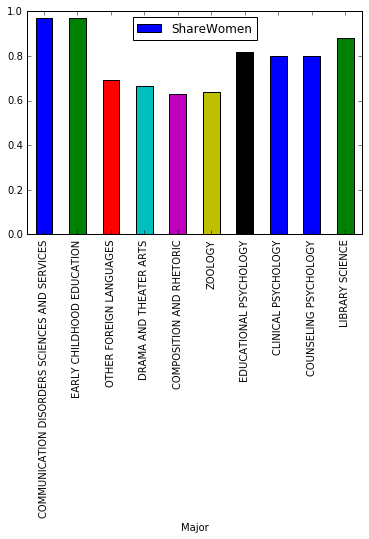

In [19]:
recent_grads.head(10).plot.bar(x='Major', y='ShareWomen')
recent_grads.tail(10).plot.bar(x='Major', y='ShareWomen')

In the first bar graph, all but one major are predominantly male as the share of women is less than 0.5. Only for 'Astronomy and Astrophysics' the share of women is greater than 0.5. 

In the second bar graph, all majors are dominated by females. 

What can be inferred from these bar graphs is that engineering majors are predominantly male dominated and the majors falling under Health, Education, Humanities and Liberal Arts, Life Sciences, Psychology & Social Work etc are dominated by females. 



#### Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

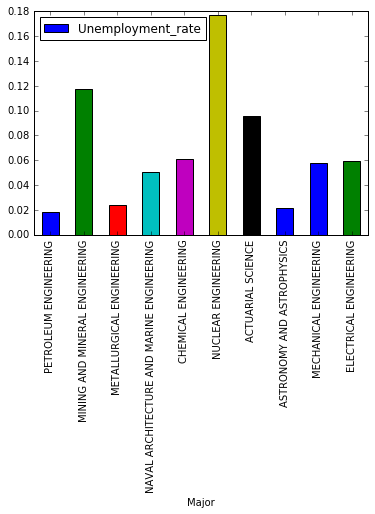

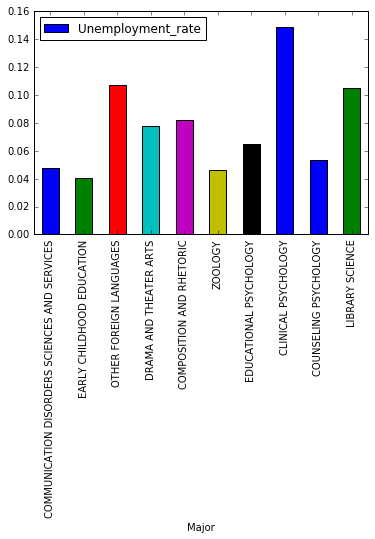

In [23]:
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate')
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate')

Most of the engineering majors have unemployment rates below 0.06 except Nuclear Engineering and Mining and Mineral Engineering. 

For the last 10 rows, the unemployment rates are higher as compared to Engineering majors with the exception of Early Childhood Education, Zoology & Councelling Psychology.

####  Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

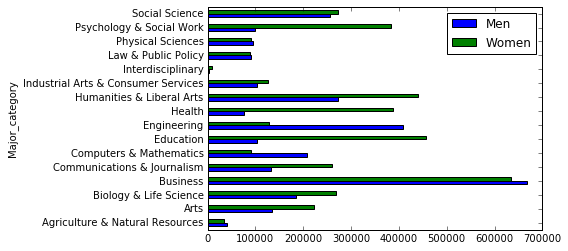

In [24]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.barh()

The number of men is significantly higher than that of women in 'Engineering' and 'Computers & Mathematics' categories. Most of the other categories have a higher number of women.

#### Use a box plot to explore the distributions of median salaries and unemployment rate.

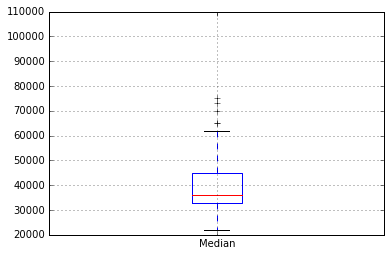

In [27]:
recent_grads.boxplot(column=['Median'])

Fifty percent of the people have median salaries below 35000. The maximum and minimum salaries are 62000 and 22000 respectively.

(0, 15000)

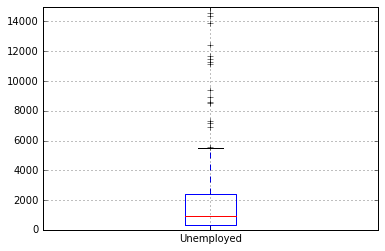

In [33]:
ax=recent_grads.boxplot(column=['Unemployed'])
ax.set_ylim(0,15000)

### Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

#### Median income vs Sample size

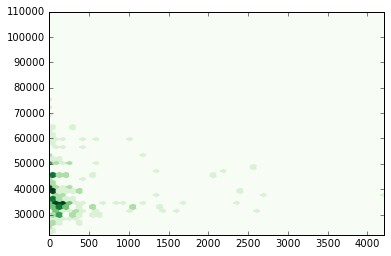

In [52]:
plt.hexbin(x=recent_grads.Sample_size, y=recent_grads.Median, gridsize=50,cmap=plt.cm.Greens)